In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

from unidecode import unidecode

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from listes import *

In [2]:
from mydataviz import *

In [3]:
# Chargement du dataset complet (317661, 28)
#data = pd.read_csv('./data/data_clean.csv', low_memory=False)

In [4]:
# Création d'un extrait du dataset pour charger et expérimenter plus rapidement
#data_petit = data.iloc[np.random.randint(0, len(data), 50000)]
#data_petit.to_csv("./data/data_clean_petit.csv")

In [5]:
# Chargement du dataset version réduite (50000 valeurs pour les tests)
data = pd.read_csv("./data/data_clean_petit.csv", low_memory=False)

In [6]:
data.loc[data['carbohydrates_100g']<0] = 0

In [7]:
print("Fichier de dimension " + str(data.shape) + " :\n")

print("\n\nType des colonnes :")
print(data.dtypes.to_markdown())

print("\n\nTaux de remplissage (%) :")
print(((1- data.isna().mean())*100).to_markdown())

print("\n\nNombre de valeurs uniques par colones :")
print(data.nunique().to_markdown())

Fichier de dimension (50000, 29) :



Type des colonnes :
|                                            | 0       |
|:-------------------------------------------|:--------|
| Unnamed: 0.1                               | int64   |
| Unnamed: 0                                 | int64   |
| code                                       | int64   |
| product_name                               | object  |
| image_url                                  | object  |
| categories                                 | object  |
| ingredients_text                           | object  |
| additives_n                                | float64 |
| additives                                  | object  |
| additives_tags                             | object  |
| ingredients_from_palm_oil_n                | float64 |
| ingredients_from_palm_oil_tags             | object  |
| ingredients_that_may_be_from_palm_oil_n    | float64 |
| ingredients_that_may_be_from_palm_oil_tags | object  |
| nutrition_grade_fr          

<AxesSubplot: >

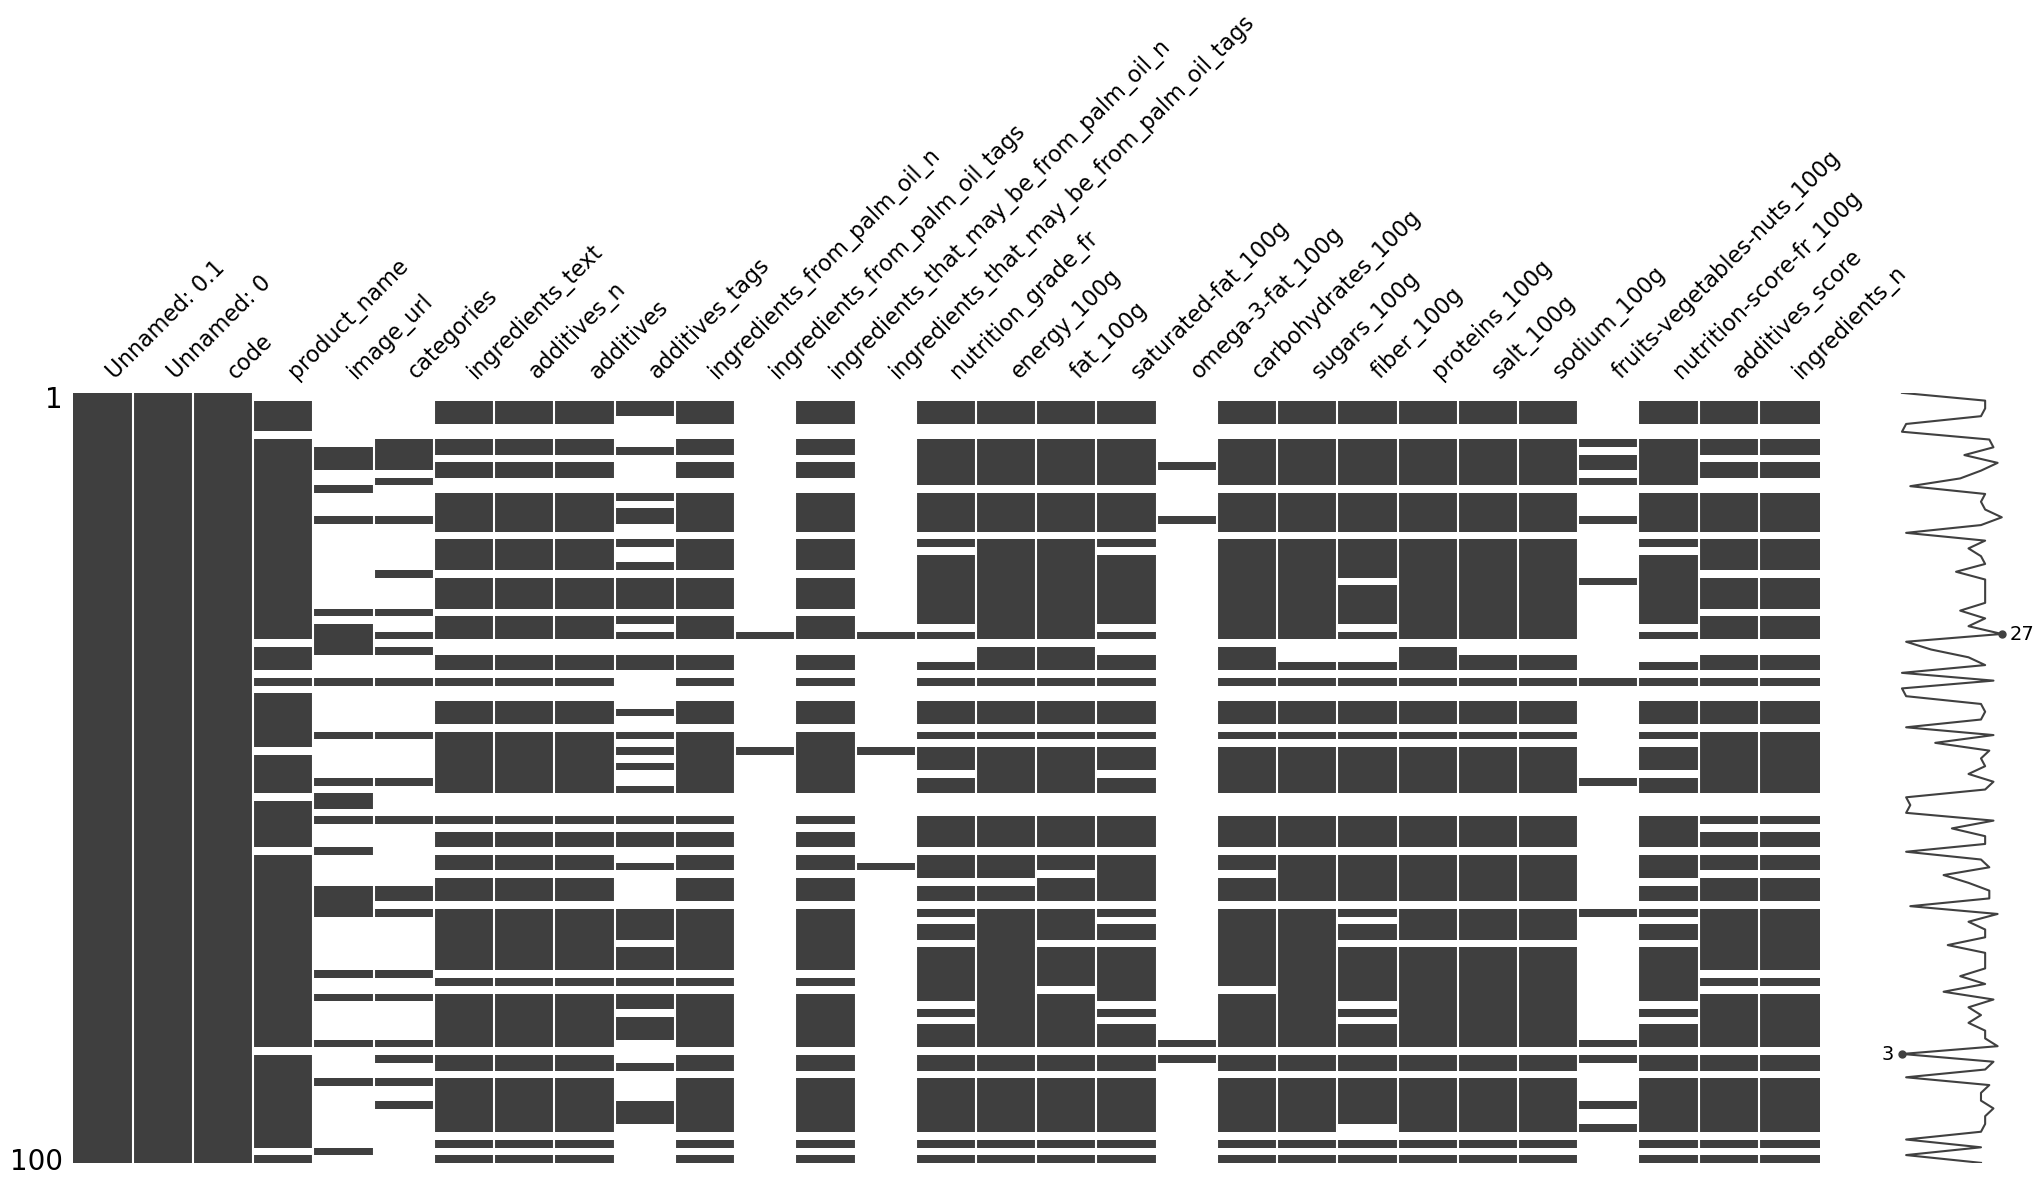

In [8]:
msno.matrix(data[:100])

# Univarié

In [9]:
txt = ' '.join(data['product_name'].astype(str).fillna(''))

In [10]:
tmp = DataSet.make_dataset(txt, 'txt')

In [11]:
wc = tmp.normalise().wordcloud(stopwords=STOPWORDS, width=900, height=600, max_font_size=120, background_color="white")

In [12]:
sns.set(rc={"figure.figsize":(18, 12)})

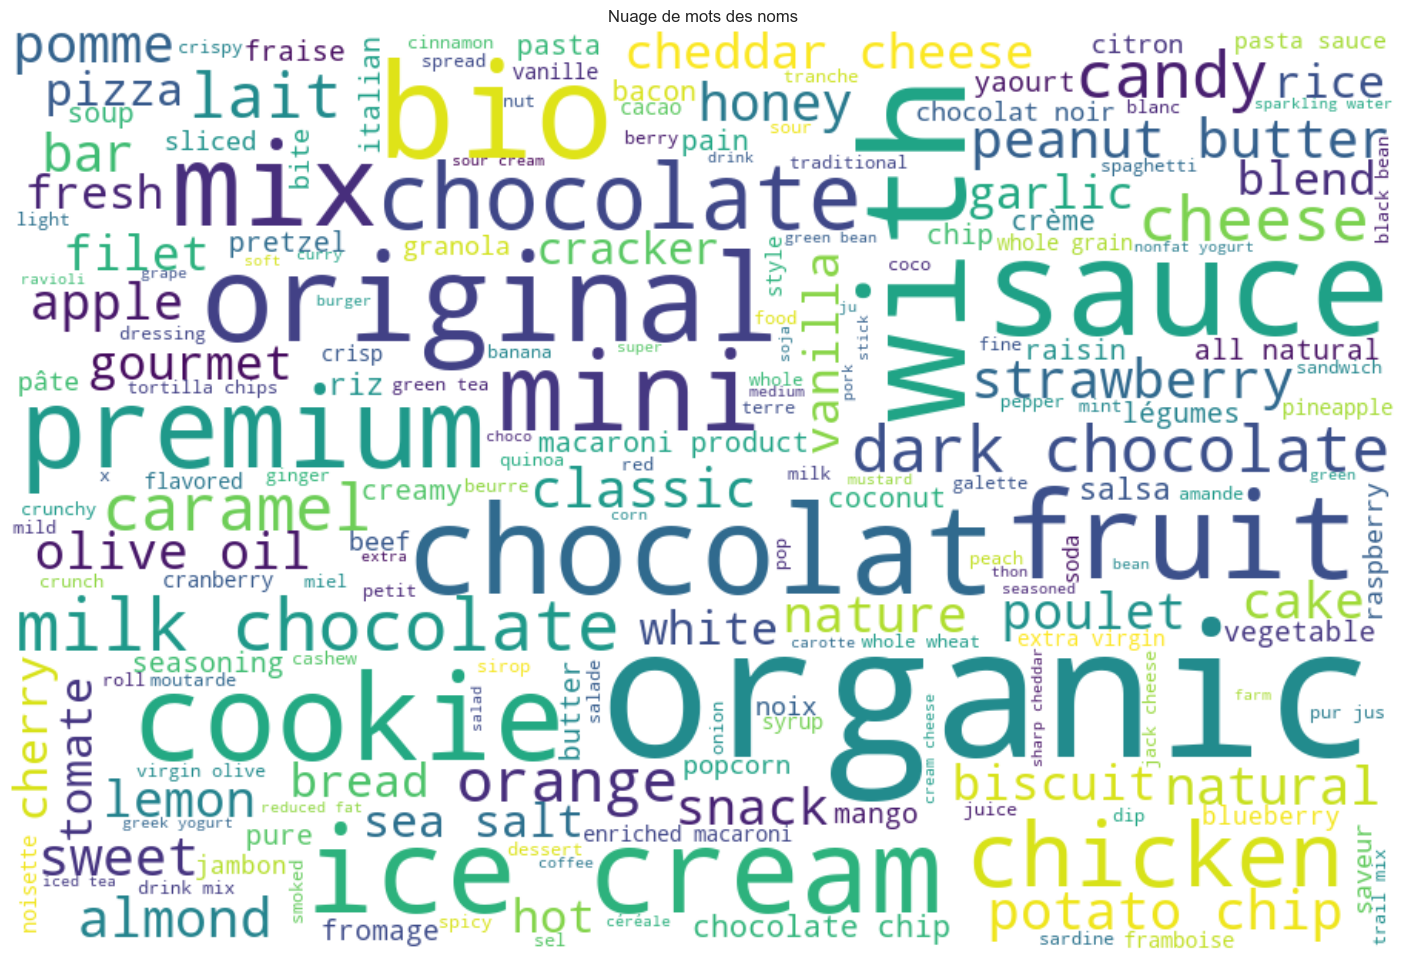

In [13]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des noms")
plt.show()

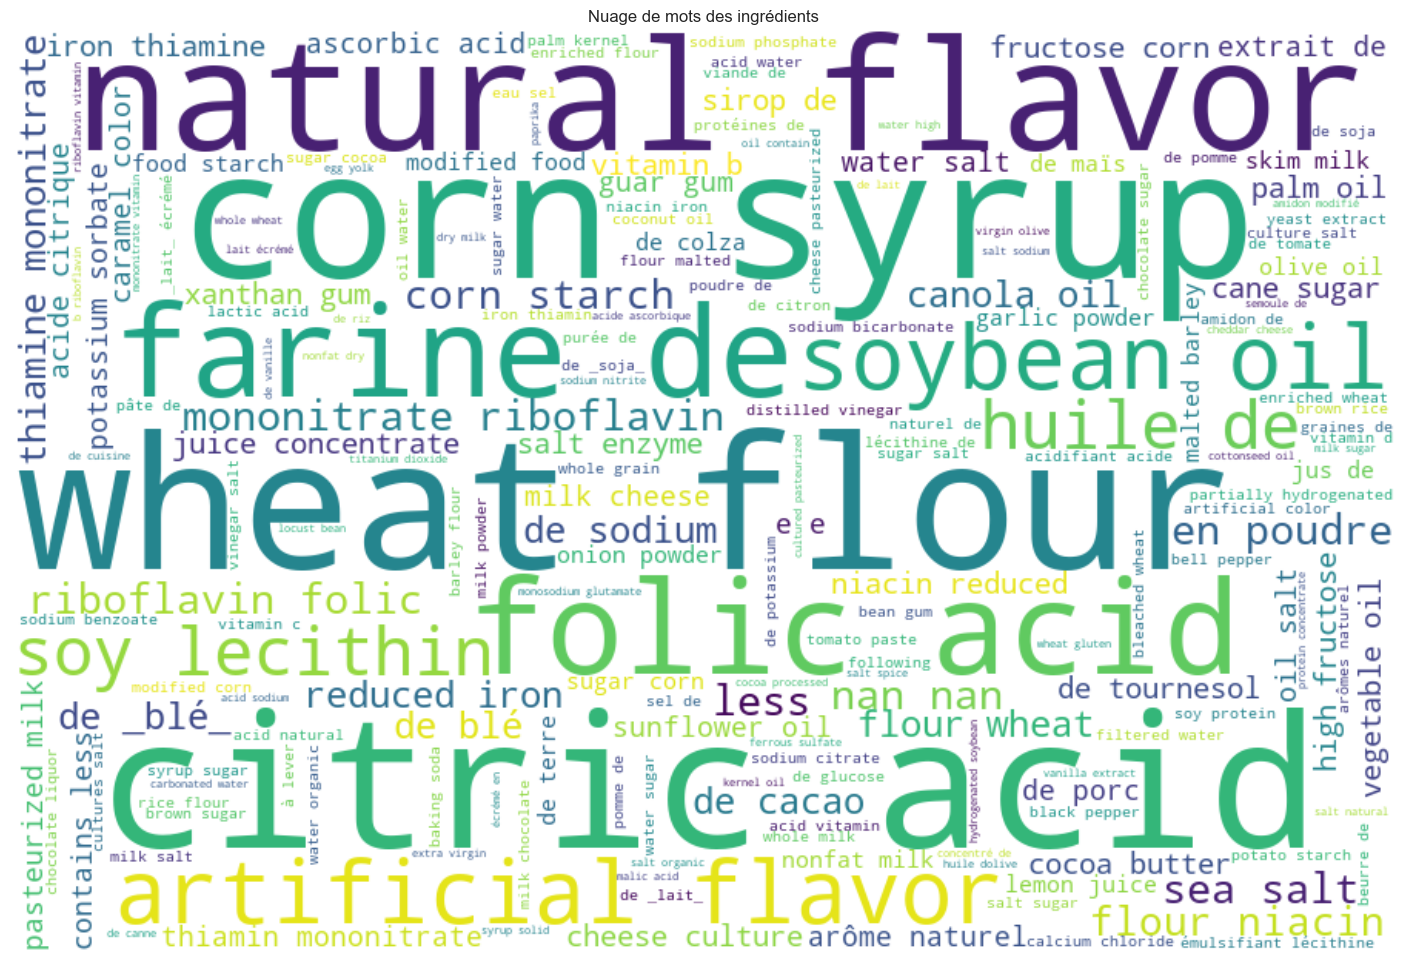

In [14]:
txt = ' '.join(data['ingredients_text'].astype(str).fillna(''))

tmp = DataSet.make_dataset(txt, 'txt')

wc = tmp.normalise().wordcloud(width=900, height=600, max_font_size=120, background_color="white")

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des ingrédients")
plt.show()

In [15]:
data['categories'].value_counts()[:10]

One-dish meals           862
Biscuits and cakes       742
Sweets                   722
Cheese                   650
Non-sugared beverages    630
Cereals                  624
Dressings and sauces     555
Processed meat           533
Milk and yogurt          515
Chocolate products       462
Name: categories, dtype: int64

In [16]:
tmp = data['categories'].value_counts()[:30]

In [17]:
def plot_piechart(data, limit=None):
    tmp = data.value_counts()
    
    if limit is not None:
        tmp = tmp[:limit]

    palette_color = sns.color_palette('bright')

    # plotting data on chart
    plt.pie(tmp.values, labels=tmp.index, colors=palette_color, autopct='%.0f%%')

    # displaying chart
    plt.show()


def plot_barchartcat(data, limit=None):
    tmp = data.value_counts()
    
    if limit is not None:
        tmp = tmp[:limit]

    print(tmp.values)
    print(list(tmp.index))
    sns.displot(tmp.values, x=list(tmp.index), kind="hist")

In [18]:
sns.set(rc={"figure.figsize":(10, 6)})

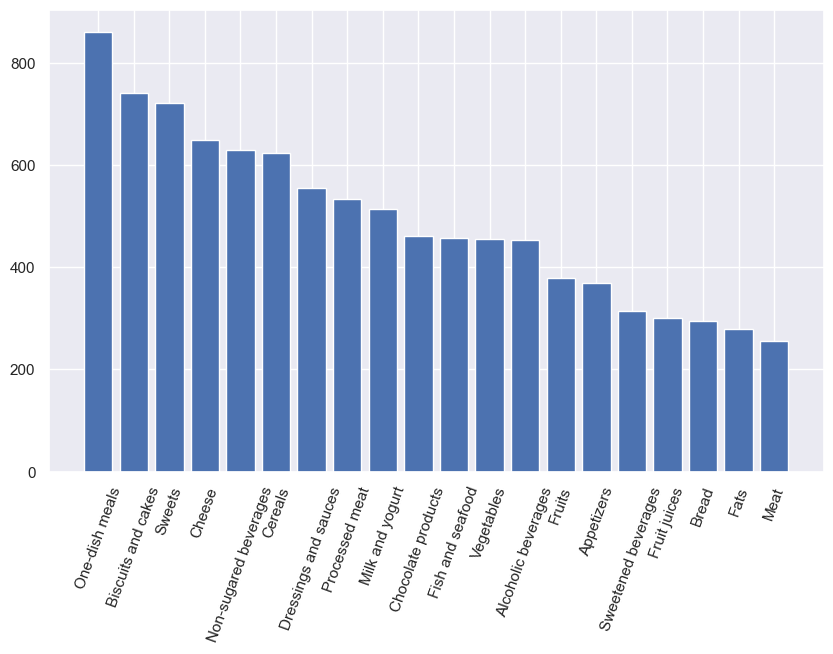

In [19]:
tmp = data['categories'].value_counts()[:20]

plt.bar(list(tmp.index), tmp.values)

plt.xticks(rotation=70)

plt.show()

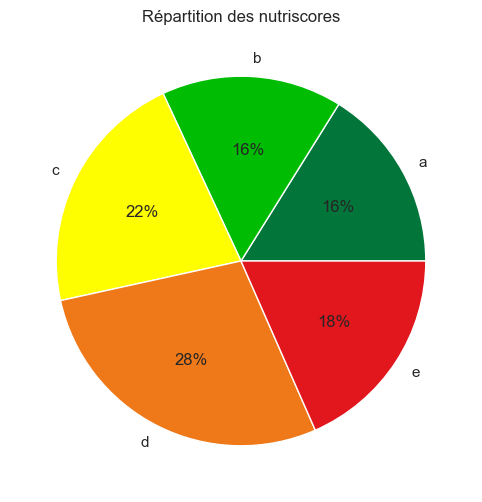

In [20]:
tmp = data['nutrition_grade_fr'].value_counts()

tmp = tmp.reindex(['a', 'b', 'c', 'd', 'e'])


palette_color = sns.color_palette('bright')

plt.pie(tmp.values, labels=tmp.index, colors=['#02753a', '#00bc02', '#fffe00', '#ef7819', '#e2161d'], autopct='%.0f%%')
plt.title("Répartition des nutriscores")
plt.show()

In [21]:
tmp = data['additives_tags'].str.split(',', expand = True).stack().str.replace('en:', '')
tmp

1      0    e375
       1    e101
2      0    e301
       1    e300
       2    e101
            ... 
49986  1    e102
       2    e133
       3    e171
49994  0    e509
       1    e330
Length: 75153, dtype: object

In [22]:
#tmp = data['nutrition_grade_fr']

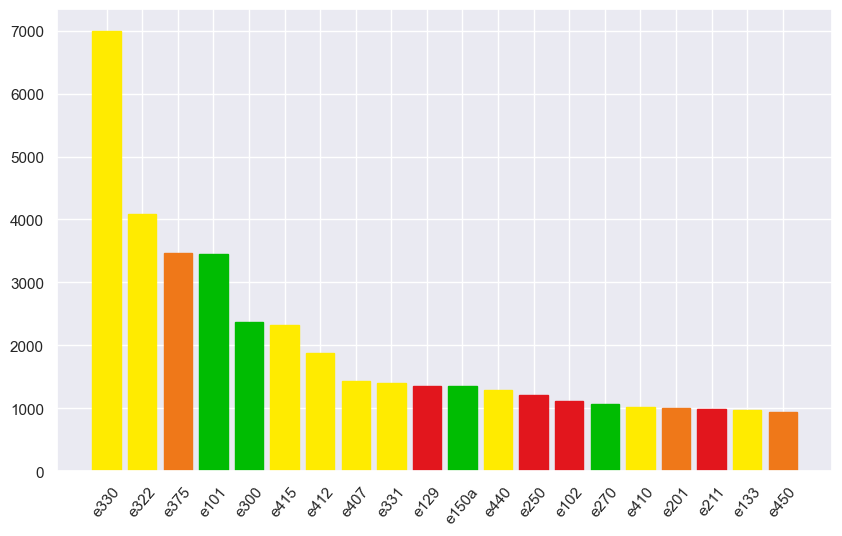

In [23]:
tmp = data['additives_tags'].str.split(',', expand = True).stack().str.replace('en:', '')

tmp = tmp.value_counts()[:20]


bars = plt.bar(list(tmp.index), tmp.values)
plt.xticks(rotation=50)

couleurAdditifs = ['', '#00bc02', '#FFEB00', '#ef7819', '#e2161d']
for i, bar in enumerate(bars):
    a = tmp.index[i]
    if a not in listeAdditifs:
        a = 'e666'
    bar.set_color(couleurAdditifs[listeAdditifs[a]])

plt.show()

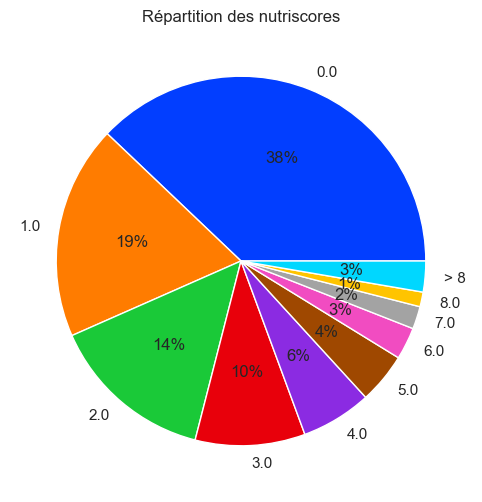

In [24]:
limit = 8

tmp = data['additives_n'].value_counts()

s = sum(tmp[limit+1:])
tmp = tmp[:limit]
tmp['> '+str(limit)] = s

palette_color = sns.color_palette('bright')

plt.pie(tmp.values, labels=tmp.index, colors=palette_color, autopct='%.0f%%')
plt.title("Répartition des nutriscores")
plt.show()

<AxesSubplot: >

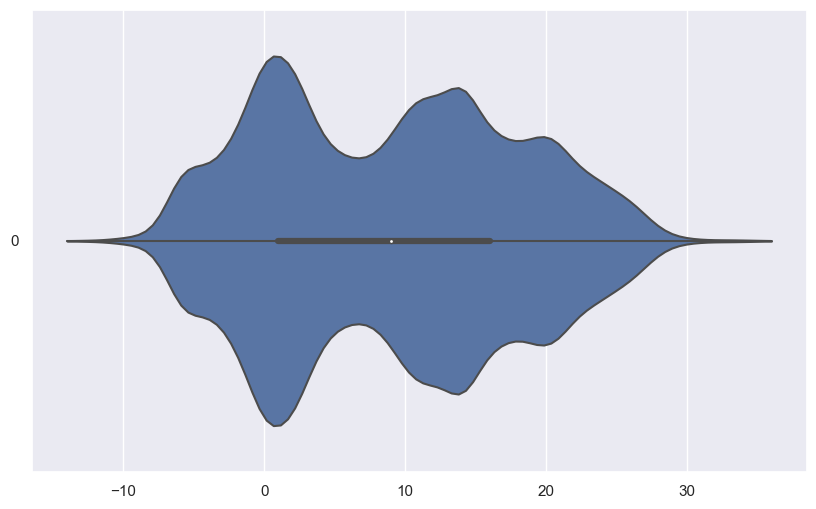

In [25]:
sns.violinplot(data=data['nutrition-score-fr_100g'], orient='h', scale='width', cut=0)

In [26]:
sns.set(rc={"figure.figsize":(10, 20)})

In [27]:
df = data[['fat_100g', 'saturated-fat_100g', 'omega-3-fat_100g',
'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g']]

<AxesSubplot: >

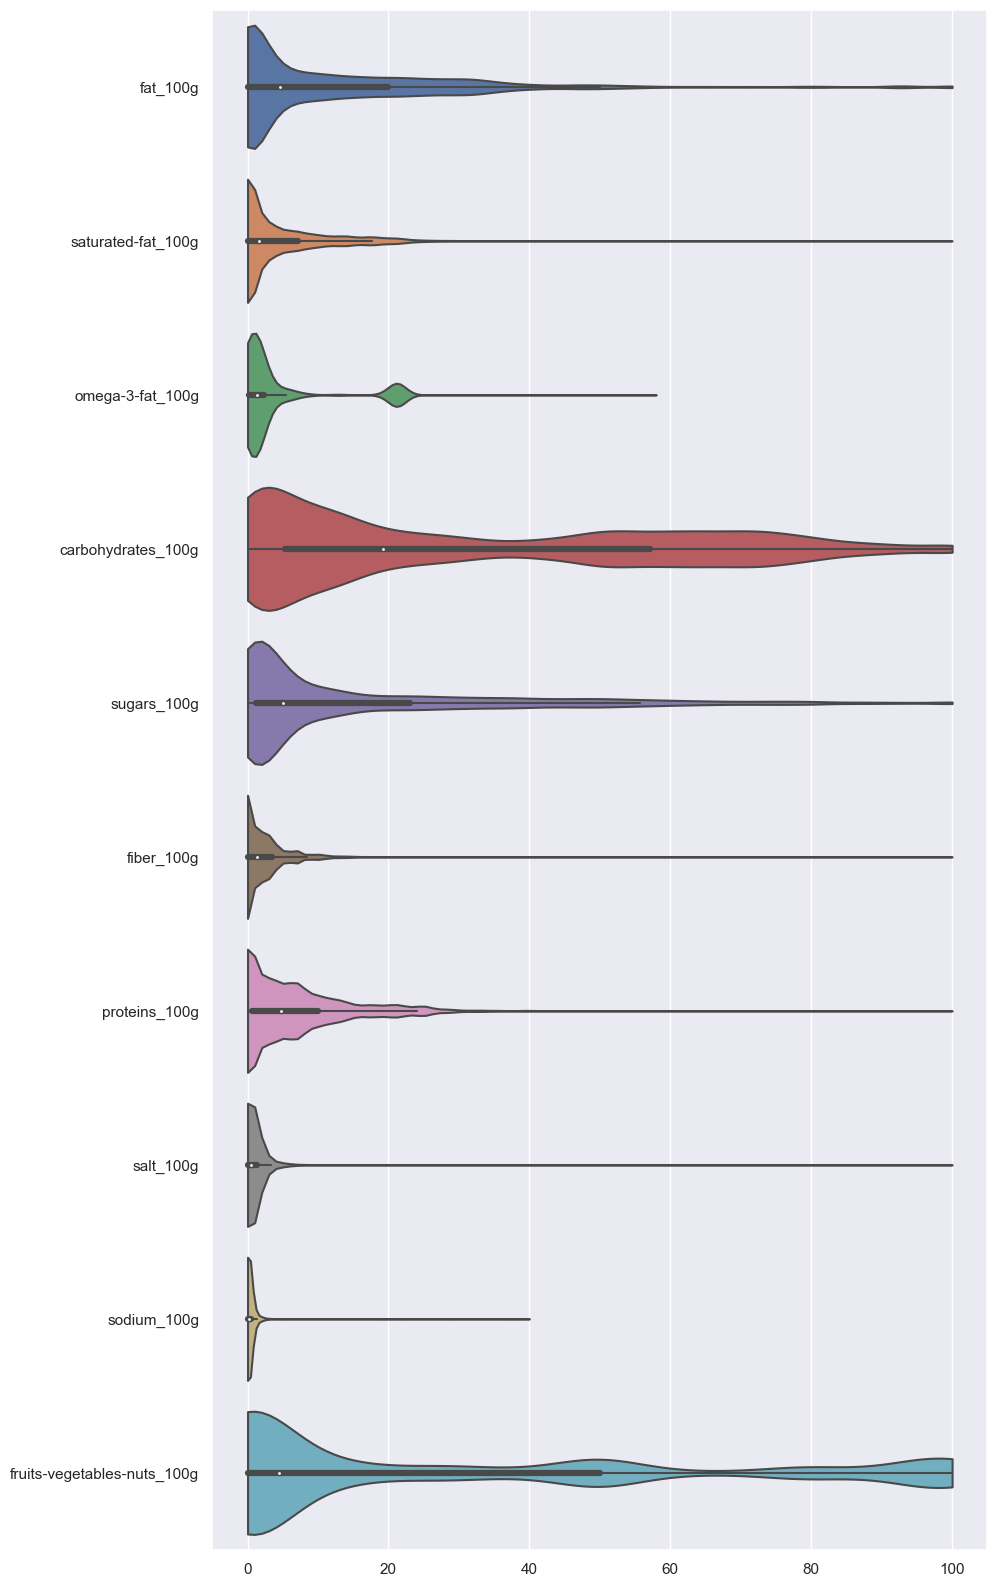

In [28]:
sns.violinplot(data=df, orient='h', scale='width', cut=0)

<AxesSubplot: >

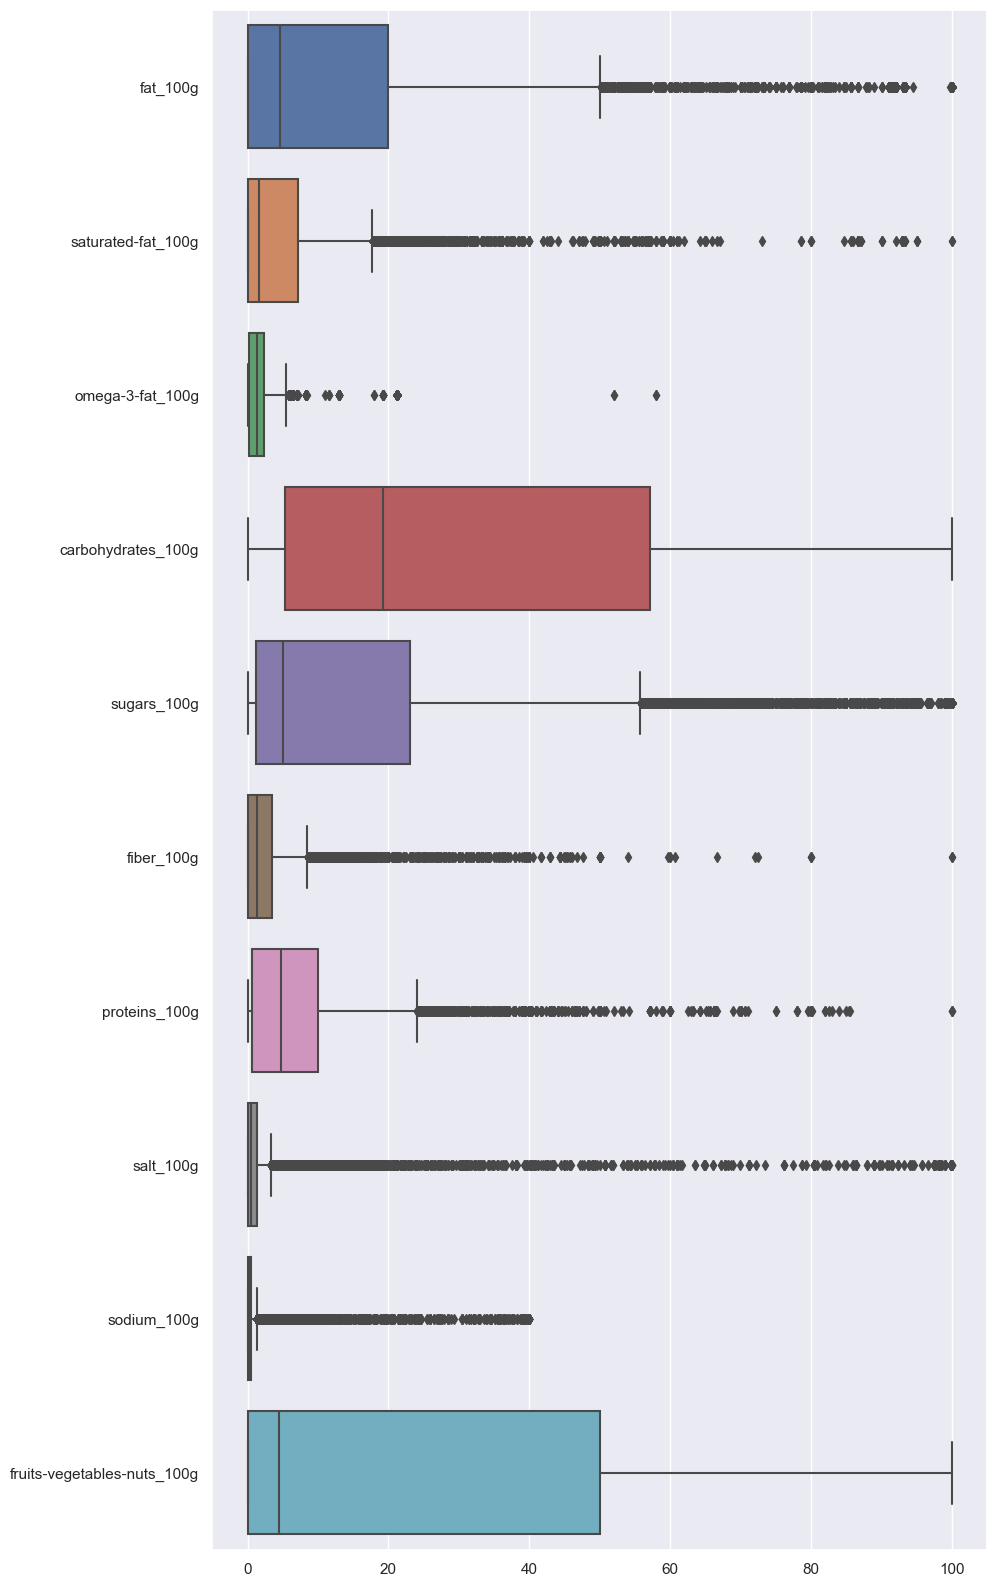

In [29]:
sns.boxplot(data=df, orient='h')

<AxesSubplot: xlabel='nutrition-score-fr_100g', ylabel='Count'>

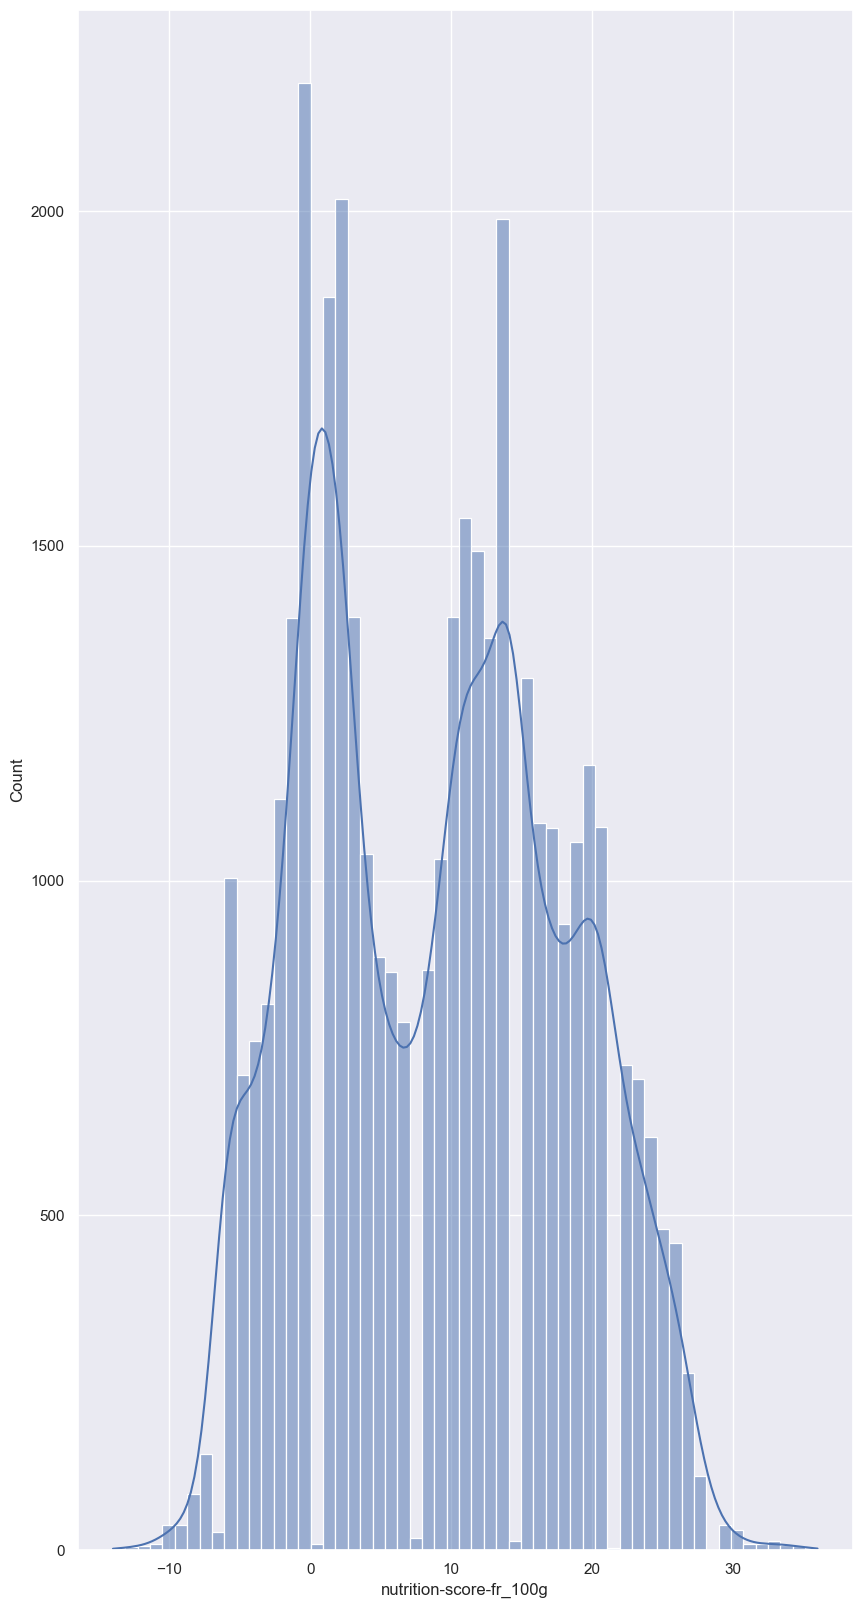

In [30]:
sns.histplot(data=data['nutrition-score-fr_100g'], kde=True)

# Bivariée

In [31]:
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 6)})

In [32]:
listeColFloat = data.dtypes[data.dtypes != 'object'][3:].index.tolist()

In [33]:
@interact
def show_articles_more_than(x=widgets.Dropdown(options=listeColFloat, value='fat_100g'),
                            y=widgets.Dropdown(options=listeColFloat, value='saturated-fat_100g'), 
                            couleur=widgets.Dropdown(options=listeColFloat, value='energy_100g')):
    fig = plt.figure()
    ax = plt.axes()

    ax.scatter(data[x], data[y], c=data[couleur], alpha=0.3)

    ax.set_title('3d Scatter plot geeks for geeks')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

interactive(children=(Dropdown(description='x', index=4, options=('additives_n', 'ingredients_from_palm_oil_n'…

In [34]:
nomcolonnes = {'fat_100g':'Lipides', 'saturated-fat_100g':'Graisses saturées', 'energy_100g':'Energie',
              'carbohydrates_100g':'Glucides', 'sugars_100g':'Sucres', 'proteins_100g':'Protéines',
              'nutrition-score-fr_100g':'Nutriscore', 'omega-3-fat_100g':'Omega3', 'fiber_100g':'Fibres',
              'salt_100g':'Sel', 'sodium_100g':'Sodium', 'fruits-vegetables-nuts_100g':'Fruits, legumes et noix',
              'additives_n':"Nombre d'additifs", 'ingredients_from_palm_oil_n':"Nombre d'ingrédients palmiques",
              'ingredients_that_may_be_from_palm_oil_n':"Nombre d'ingrédients possiblement palmiques",
              'nutrition_grade_fr':'Classement Nutriscore'}

In [35]:
listeScatter = pd.DataFrame([['fat_100g', 'saturated-fat_100g', 'energy_100g', None],
                             ['carbohydrates_100g', 'sugars_100g', 'energy_100g', None],
                             ['fat_100g', 'proteins_100g', 'energy_100g', None],
                             ['fat_100g', 'proteins_100g', 'nutrition-score-fr_100g', None],
                             ['proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g', None],
                             ['fat_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g', None],
                             ['salt_100g', 'sodium_100g', '', None],
                             ['nutrition-score-fr_100g', 'energy_100g', '', None]], columns=['x', 'y', 'c', 'title'])

listeScatter['title'] = listeScatter['x'] + ' * ' + listeScatter['y'] + ' - ' + listeScatter['c']

listeInteract = []

for i in listeScatter.index:
    listeInteract += [(listeScatter.loc[i, 'title'], i)]

In [36]:
@interact
def show_articles_more_than(graphique=widgets.Dropdown(options=listeInteract)):
    x = listeScatter.loc[graphique, 'x']
    y = listeScatter.loc[graphique, 'y']
    c = listeScatter.loc[graphique, 'c']
    if c != '':
        cNom = nomcolonnes[c]
        c = data[c]
    else:
        cNom = ''
        c = None
    t = listeScatter.loc[graphique, 'title']
    
    fig = plt.figure()
    ax = plt.axes()

    sc = ax.scatter(data[x], data[y], c=c, alpha=1)
    ax.scatter(data[x], data[y], c=c, alpha=0.3)

    ax.set_title('3d Scatter plot geeks for geeks')
    ax.set_xlabel(nomcolonnes[x])
    ax.set_ylabel(nomcolonnes[y])
    
    
    #legend
    if c is not None:
        cb = fig.colorbar(sc, ax=ax)
        cb.set_label(cNom)
    
    
    plt.show()

interactive(children=(Dropdown(description='graphique', options=(('fat_100g * saturated-fat_100g - energy_100g…

In [37]:
%matplotlib notebook

<IPython.core.display.Javascript object>


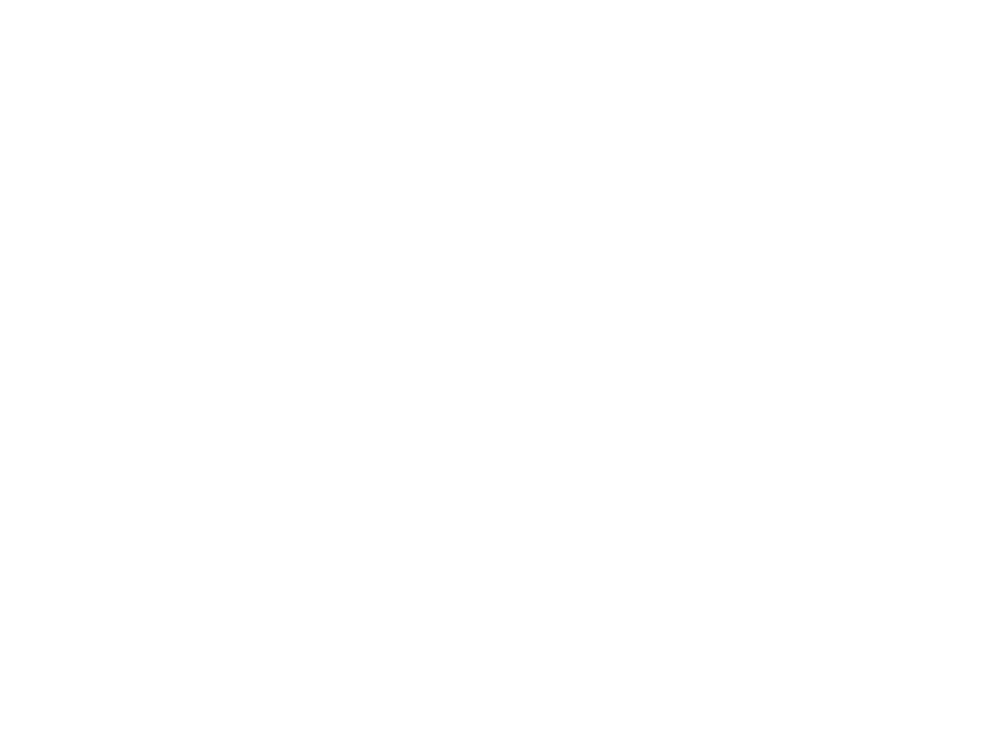

In [38]:
fig = plt.figure()
ax = plt.axes(projection="3d")

#energy_100g
sc = ax.scatter(data['fat_100g'], data['carbohydrates_100g'], data['proteins_100g'], c=data['nutrition-score-fr_100g'], alpha=1, s=0)
ax.scatter(data['fat_100g'], data['carbohydrates_100g'], data['proteins_100g'], c=data['nutrition-score-fr_100g'], alpha=0.1, s=7)

ax.set_title('3d Scatter plot geeks for geeks')
ax.set_xlabel('Lipides')
ax.set_ylabel('Glucides')
ax.set_zlabel('Proteines')

cb = fig.colorbar(sc, ax=ax)
cb.set_label('Nutriscore')

plt.show()

In [39]:
%matplotlib inline

In [40]:
listeColNum = data.dtypes.loc[data.dtypes != 'object'].index[2:].to_list()

<AxesSubplot: >

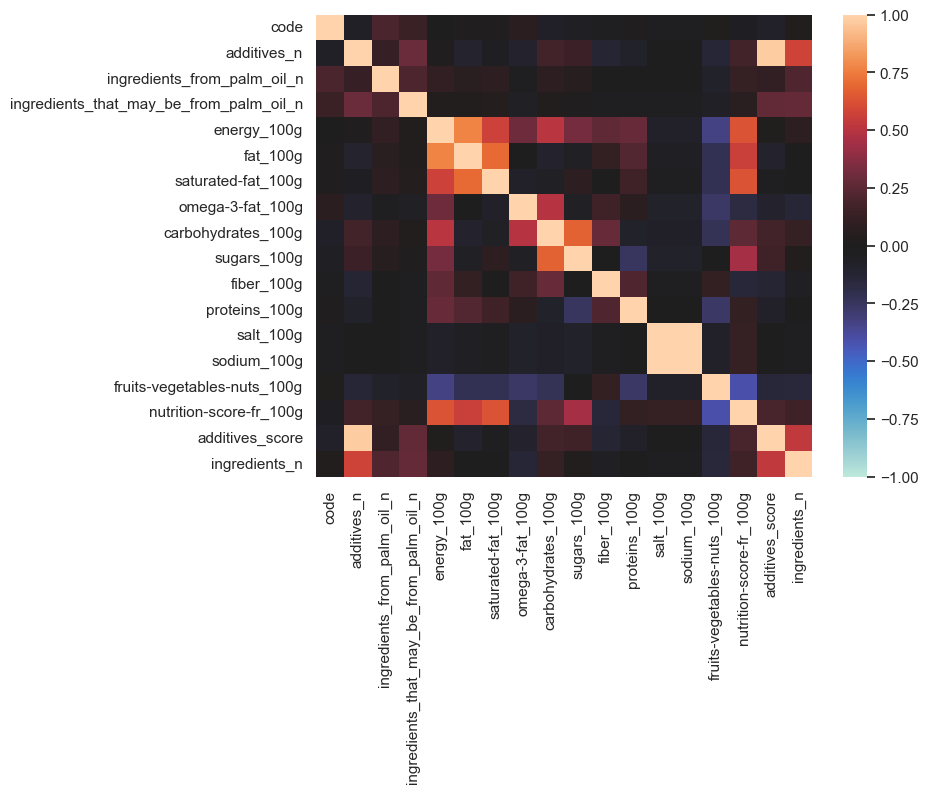

In [41]:
sns.heatmap(data[listeColNum].corr(), vmin=-1, vmax=1, center=0)

In [42]:
%matplotlib inline

In [43]:
nbVals = 15

In [44]:
dataFrequent = data.loc[data["categories"].isin(data['categories'].value_counts()[:nbVals].index.to_list())]

In [45]:
sns.set(rc={"figure.figsize":(10, 12)})

In [46]:
@interact
def show_articles_more_than(x=widgets.Dropdown(options=listeColFloat, value='fat_100g')):
    #ax = sns.stripplot(data=dataFrequent, x=x, y="categories", hue="nutrition-score-fr_100g", orient='h', alpha=0.3)
    ax = sns.boxplot(data=dataFrequent, x=x, y="categories", orient='h')
    
    ax.set(xlabel=nomcolonnes[x],
           ylabel='Catégorie',
           title='Boxplot des ' + nomcolonnes[x] + ' pour les ' + str(nbVals) + ' catégories les plus fréquentes')
    
    plt.show()

interactive(children=(Dropdown(description='x', index=4, options=('additives_n', 'ingredients_from_palm_oil_n'…

# PCA

In [47]:
sns.set(rc={"figure.figsize":(10, 6)})

In [48]:
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [49]:
scaler = StandardScaler()

In [50]:
listeColNum = data.dtypes.loc[data.dtypes != 'object'].index[2:].to_list()

In [51]:
listeColNum.remove('code')
listeColNum.remove('sodium_100g')
#listeColNum.remove('sugars_100g')
listeColNum.remove('omega-3-fat_100g')
#listeColNum.remove('saturated-fat_100g')
listeColNum.remove('additives_n')
listeColNum.remove('ingredients_from_palm_oil_n')
listeColNum.remove('ingredients_that_may_be_from_palm_oil_n')
listeColNum.remove('fruits-vegetables-nuts_100g')
listeColNum

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g',
 'additives_score',
 'ingredients_n']

In [52]:
dataPCA = data[listeColNum]

In [53]:
dataPCA = SimpleImputer(missing_values=np.nan, strategy='mean').fit(dataPCA).transform(dataPCA)

In [54]:
X_scaled = scaler.fit_transform(dataPCA)

In [55]:
pd.DataFrame(X_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.50,-0.79,-0.72,-1.18,-0.80,-0.70,-0.92,-0.27,-2.93,-0.84,-1.21
25%,-0.89,-0.76,-0.70,-0.91,-0.71,-0.70,-0.78,-0.25,-0.76,-0.84,-0.65
50%,0.00,-0.16,-0.19,-0.00,-0.32,0.00,-0.12,-0.13,0.00,-0.06,0.00
75%,0.64,0.22,0.00,0.75,0.06,0.01,0.25,0.00,0.64,0.13,0.29
max,3.61,5.49,13.67,2.60,4.37,26.54,12.18,16.87,3.45,10.57,24.34


In [56]:
n_components = 6

In [57]:
pca = PCA(n_components=n_components)

In [58]:
pca.fit(X_scaled)

PCA(n_components=6)

In [59]:
(pca.explained_variance_ratio_*100).round(2)

array([27.45, 17.98, 13.48, 11.36,  9.16,  6.59])

In [60]:
x, y = 0,1

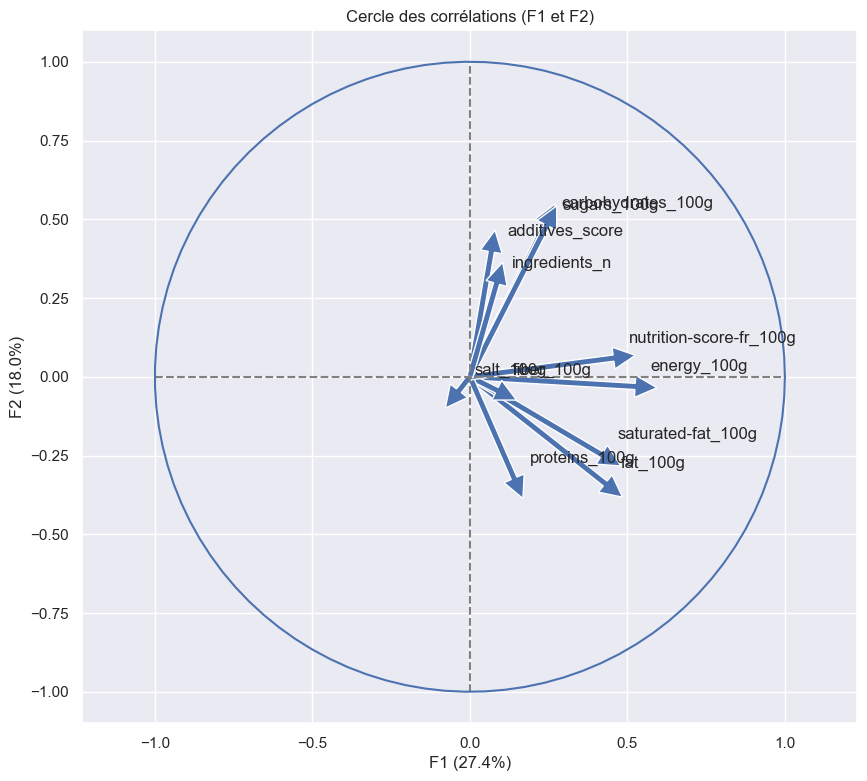

In [61]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             listeColNum[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

# ANOVA